In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/skin-cancer9-classesisic/skin cancer isic the international skin imaging collaboration/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0027107.jpg
/kaggle/input/skin-cancer9-classesisic/skin cancer isic the international skin imaging collaboration/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0029973.jpg
/kaggle/input/skin-cancer9-classesisic/skin cancer isic the international skin imaging collaboration/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0025954.jpg
/kaggle/input/skin-cancer9-classesisic/skin cancer isic the international skin imaging collaboration/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0027216.jpg
/kaggle/input/skin-cancer9-classesisic/skin cancer isic the international skin imaging collaboration/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0029297

In [ ]:
!nvidia-smi

Thu Jul 17 04:53:24 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P0             27W /  250W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import kagglehub
nodoubttome_skin_cancer9_classesisic_path = kagglehub.dataset_download('nodoubttome/skin-cancer9-classesisic')

print('Data source import complete.')

Data source import complete.


In [ ]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import glob
from keras import layers
from tensorflow import data as tf_data

2025-07-17 04:54:29.788633: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752728069.986162      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752728070.045568      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
print("GPU available: ", tf.config.list_physical_devices('GPU'))

GPU available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
dataset_path = "/kaggle/input/skin-cancer9-classesisic"
print("Path to dataset files:", dataset_path)

Path to dataset files: /kaggle/input/skin-cancer9-classesisic


In [ ]:
print("current directory contents: \n", os.listdir(dataset_path))

current directory contents: 
 ['Skin cancer ISIC The International Skin Imaging Collaboration', 'skin cancer isic the international skin imaging collaboration']


In [ ]:
ISIC_folder = os.path.join(dataset_path, os.listdir(dataset_path)[0])
print(ISIC_folder)

/kaggle/input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration


In [ ]:
train_image_folder = os.path.join(ISIC_folder, os.listdir(ISIC_folder)[1])
print(train_image_folder)
test_image_folder = os.path.join(ISIC_folder, os.listdir(ISIC_folder)[0])
print(test_image_folder)

/kaggle/input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Train
/kaggle/input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Test


In [ ]:
train_images_address = []
train_images_labels = []
test_images_address = []
test_images_labels = []

count = 0
for folder in os.listdir(train_image_folder):
    folder_path = os.path.join(train_image_folder, folder)
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        train_images_address.append(file_path)
        train_images_labels.append(count)
    count = count + 1

count = 0
for folder in os.listdir(test_image_folder):
    folder_path = os.path.join(test_image_folder, folder)
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        test_images_address.append(file_path)
        test_images_labels.append(count)
    count = count + 1

print("total classes in training folder: ", len(train_images_address))
print("total classes in test folder: ", len(test_images_address))
print("total training images: ",len(train_images_labels))
print("total test images", len(test_images_labels))



total classes in training folder:  2239
total classes in test folder:  118
total training images:  2239
total test images 118


I0000 00:00:1752728255.561701      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


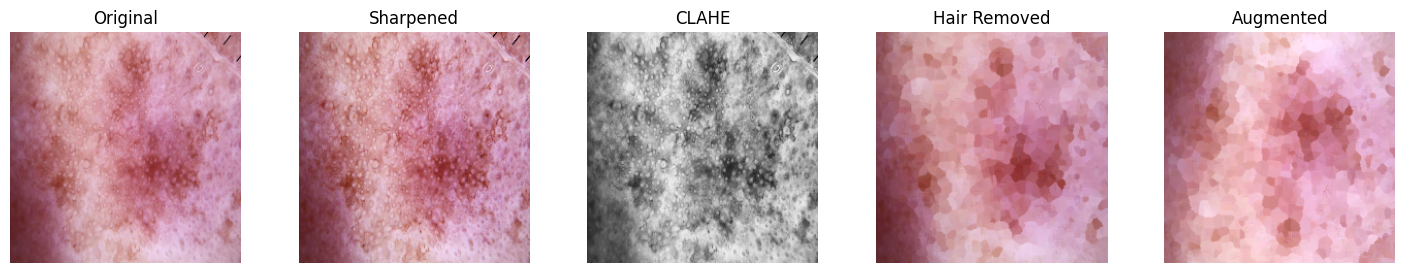

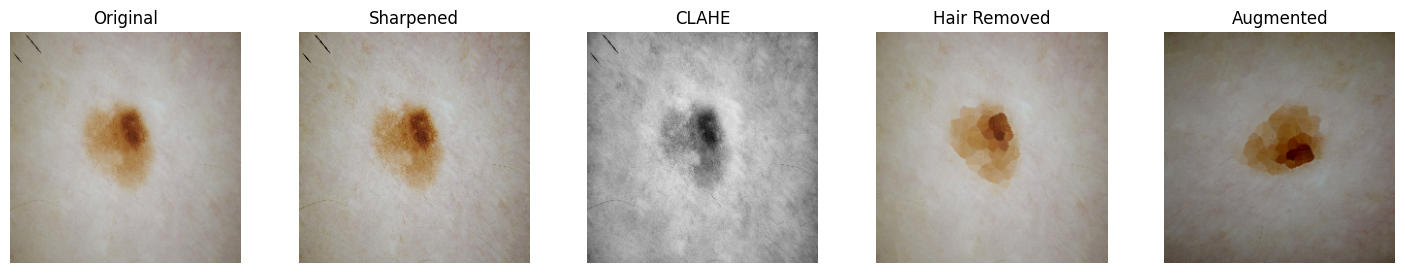

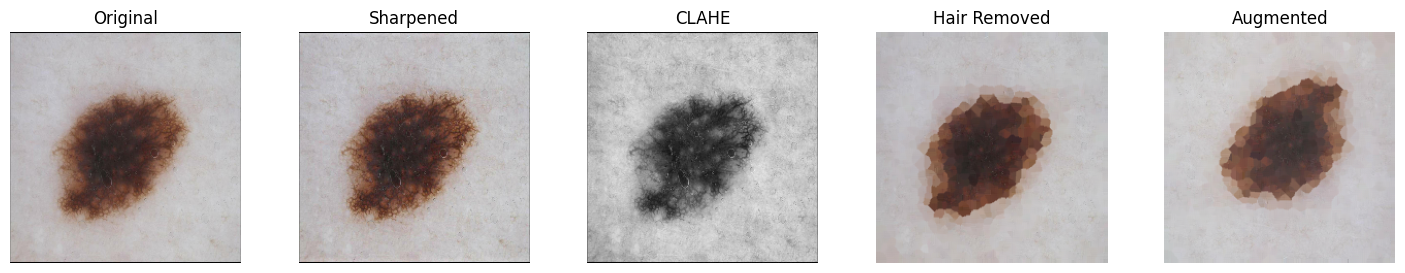

Image 1:
  Label: 8
  Hair present: [ True]
  Contrast: 34.65
Image 2:
  Label: 8
  Hair present: [False]
  Contrast: 19.47
Image 3:
  Label: 8
  Hair present: [ True]
  Contrast: 50.87
Image 4:
  Label: 8
  Hair present: [ True]
  Contrast: 17.46
Image 5:
  Label: 8
  Hair present: [ True]
  Contrast: 49.18
Image 6:
  Label: 8
  Hair present: [ True]
  Contrast: 30.53
Image 7:
  Label: 8
  Hair present: [ True]
  Contrast: 19.19
Image 8:
  Label: 8
  Hair present: [ True]
  Contrast: 11.21

Images with hair: [0, 2, 3, 4, 5, 6, 7]
Images without hair: [1]
Low contrast images: [0, 1, 3, 5, 6, 7]
High contrast images: [2, 4]

--- Visualizing images with hair ---


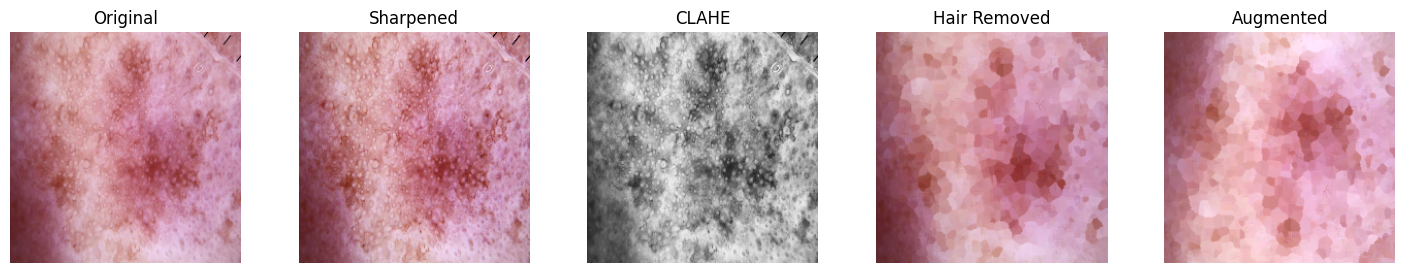

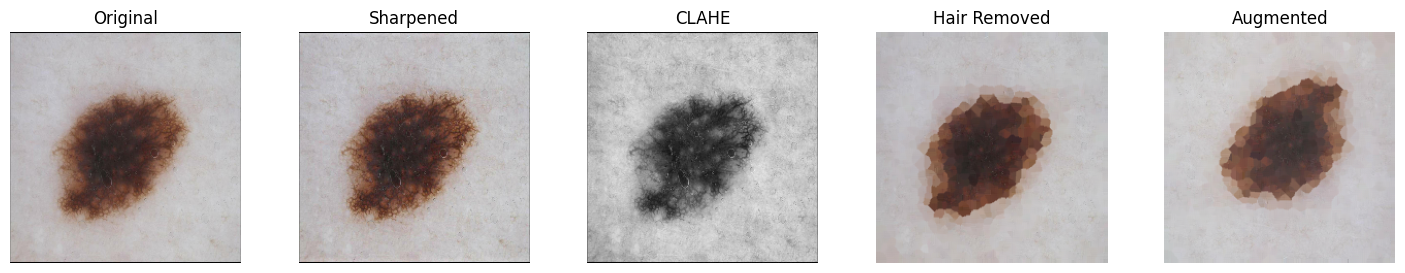

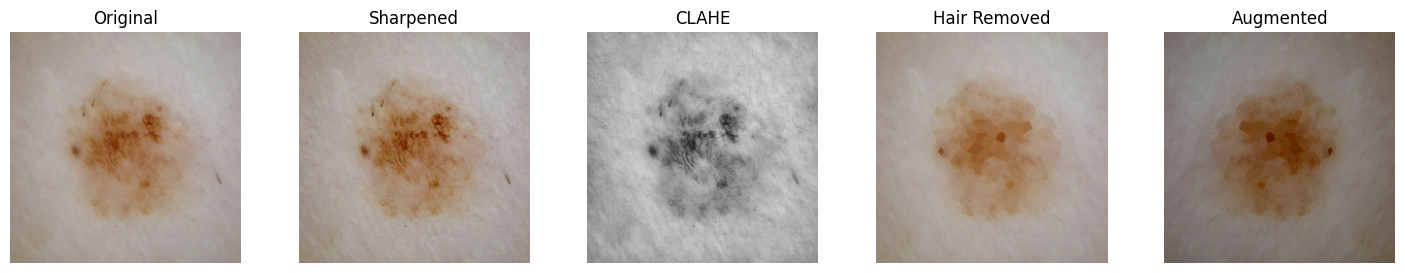


--- Visualizing low contrast images ---


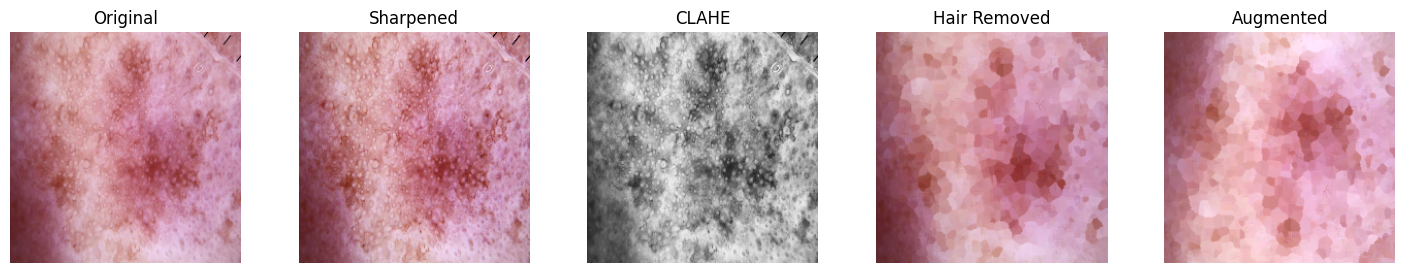

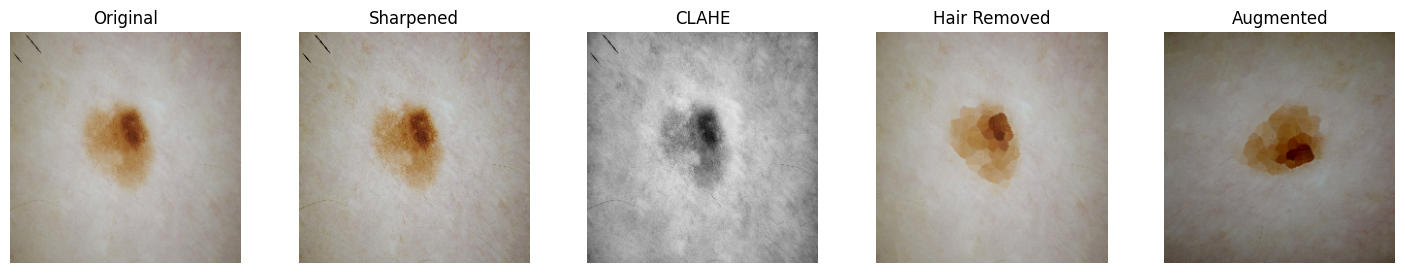

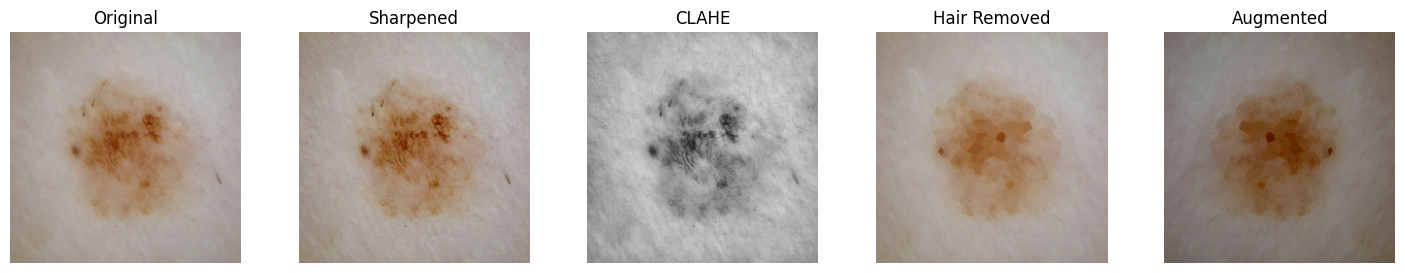


--- Visualizing high contrast images ---


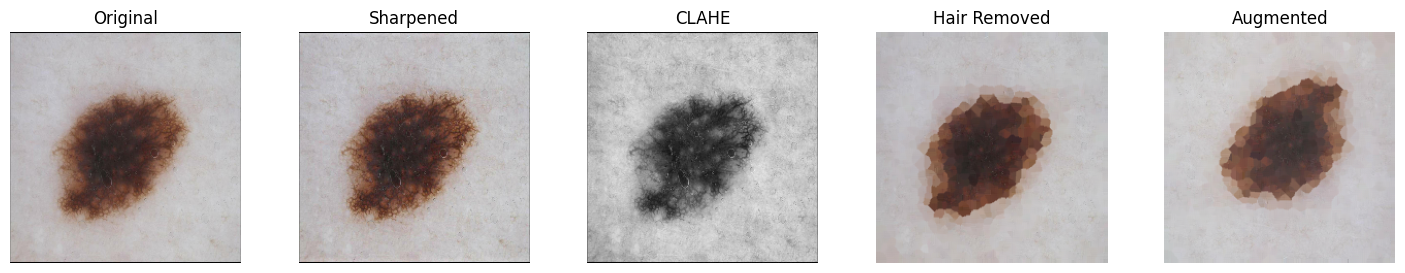

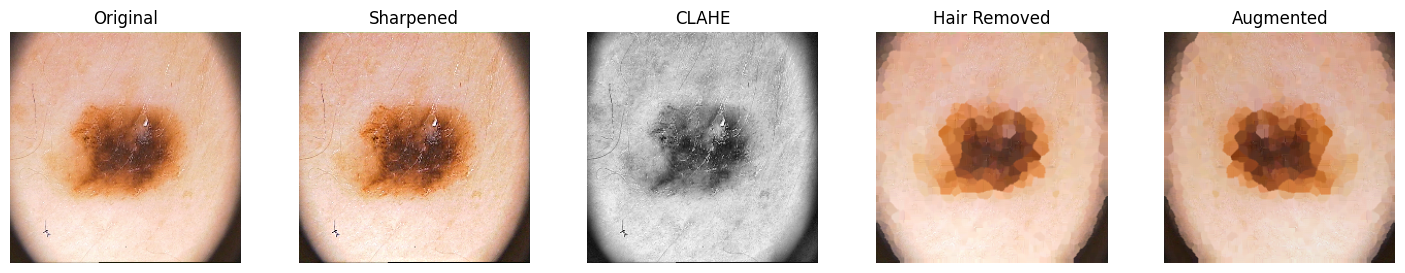


--- Batch Info ---
Image 1:
  Label: 8
  Hair present: [ True]
  Contrast: 34.65
Image 2:
  Label: 8
  Hair present: [False]
  Contrast: 19.47
Image 3:
  Label: 8
  Hair present: [ True]
  Contrast: 50.87
Image 4:
  Label: 8
  Hair present: [ True]
  Contrast: 17.46
Image 5:
  Label: 8
  Hair present: [ True]
  Contrast: 49.18
Image 6:
  Label: 8
  Hair present: [ True]
  Contrast: 30.53
Image 7:
  Label: 8
  Hair present: [ True]
  Contrast: 19.19
Image 8:
  Label: 8
  Hair present: [ True]
  Contrast: 11.21


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

class FullPreprocessingPipeline:
    def __init__(self, img_size=(224, 224), batch_size=32):
        self.img_size = img_size
        self.batch_size = batch_size

    def resize_image(self, image):
        return tf.image.resize(image, self.img_size)

    def enhance_image(self, image):
        def _enhance(img_np):
            img = (img_np * 255).astype(np.uint8) if img_np.max() <= 1.0 else img_np

            # Apply CLAHE to grayscale image
            gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
            clahe_img = clahe.apply(gray)
            clahe_3ch = cv2.cvtColor(clahe_img, cv2.COLOR_GRAY2RGB)

            # Sharpen image
            blurred = cv2.GaussianBlur(img, (0, 0), 3)
            sharpened = cv2.addWeighted(img, 1.5, blurred, -0.5, 0)

            return sharpened.astype(np.float32)/255.0, clahe_3ch.astype(np.float32)/255.0

        sharp_img, clahe_img = tf.numpy_function(_enhance, [image], [tf.float32, tf.float32])
        sharp_img.set_shape([self.img_size[0], self.img_size[1], 3])
        clahe_img.set_shape([self.img_size[0], self.img_size[1], 3])
        return sharp_img, clahe_img

    def remove_hair(self, image):
        def _remove(img_np):
            img = (img_np * 255).astype(np.uint8) if img_np.max() <= 1.0 else img_np
            gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            edges = cv2.Canny(gray, 10, 100)
            kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
            dilated = cv2.dilate(edges, kernel, iterations=1)
            inpainted = cv2.inpaint(img, dilated, 1, cv2.INPAINT_TELEA)
            return inpainted.astype(np.float32)/255.0

        inpainted = tf.numpy_function(_remove, [image], tf.float32)
        inpainted.set_shape([self.img_size[0], self.img_size[1], 3])
        return inpainted

    def augment_image(self, image):
        image = tf.image.random_flip_left_right(image)
        image = tf.image.random_flip_up_down(image)
        image = tf.image.random_brightness(image, max_delta=0.2)
        image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
        k = tf.random.uniform([], 0, 4, tf.int32)
        image = tf.image.rot90(image, k)
        image = tf.clip_by_value(image, 0, 1)
        return image

    def detect_hair(self, image):
        def _hair(img_np):
            img = (img_np * 255).astype(np.uint8) if img_np.max() <= 1.0 else img_np
            gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            edges = cv2.Canny(gray, 50, 150)
            return np.array([np.sum(edges > 0) > 500], dtype=np.bool_)

        return tf.numpy_function(_hair, [image], tf.bool)

    def image_contrast(self, image):
        def _contrast(img_np):
            img = (img_np * 255).astype(np.uint8) if img_np.max() <= 1.0 else img_np
            gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            return np.array([gray.std()], dtype=np.float32)

        return tf.numpy_function(_contrast, [image], tf.float32)

    def preprocess_and_group(self, image_path, label) -> dict:
        image = tf.io.read_file(image_path)
        image = tf.image.decode_image(image, channels=3)
        image.set_shape([None, None, 3])
        image = tf.image.convert_image_dtype(image, tf.float32)
        image = self.resize_image(image)

        # Enhance and clean
        sharp_img, clahe_img = self.enhance_image(image)
        inpainted_img = self.remove_hair(image)
        aug_img = self.augment_image(inpainted_img)

        has_hair = self.detect_hair(image)
        contrast = self.image_contrast(image)

        return {
            'original': image,
            'sharpened': sharp_img,
            'clahe': clahe_img,
            'cleaned': inpainted_img,
            'augmented': aug_img,
            'label': label,
            'has_hair': has_hair,
            'contrast': contrast
        }

    def create_full_dataset(self, image_paths, labels):
        dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))
        dataset = dataset.map(self.preprocess_and_group, num_parallel_calls=tf.data.AUTOTUNE)
        dataset = dataset.cache("/tmp/tf_cache_isic").batch(self.batch_size).prefetch(tf.data.AUTOTUNE)
        return dataset

    def visualize_comparison(self, batch, num_images=3):
        for i in range(num_images):
            plt.figure(figsize=(18, 3))
            plt.subplot(1, 5, 1)
            plt.imshow(np.asarray(batch['original'][i]))
            plt.title('Original')
            plt.axis('off')
            plt.subplot(1, 5, 2)
            plt.imshow(np.asarray(batch['sharpened'][i]))
            plt.title('Sharpened')
            plt.axis('off')
            plt.subplot(1, 5, 3)
            plt.imshow(np.asarray(batch['clahe'][i]))
            plt.title('CLAHE')
            plt.axis('off')
            plt.subplot(1, 5, 4)
            plt.imshow(np.asarray(batch['cleaned'][i]))
            plt.title('Hair Removed')
            plt.axis('off')
            plt.subplot(1, 5, 5)
            plt.imshow(np.asarray(batch['augmented'][i]))
            plt.title('Augmented')
            plt.axis('off')
            plt.show()

    def print_batch_info(self, batch):
        for i in range(len(batch['original'])):
            print(f"Image {i + 1}:")
            print(f"  Label: {batch['label'][i].numpy()}")
            print(f"  Hair present: {batch['has_hair'][i].numpy()}")
            print(f"  Contrast: {batch['contrast'][i].numpy().item():.2f}")

    def dataset_split(self, dataset, split_ratio=0.8, shuffle=True, seed=42):
        total_batches = tf.data.experimental.cardinality(dataset).numpy()
        if total_batches == tf.data.experimental.INFINITE_CARDINALITY:
            raise ValueError("Dataset must be finite to split")
        train_size = int(total_batches * split_ratio)
        if shuffle:
            dataset = dataset.shuffle(buffer_size=total_batches, seed=seed, reshuffle_each_iteration=False)
        return dataset.take(train_size), dataset.skip(train_size)

    @tf.autograph.experimental.do_not_convert
    def group_and_show(self, dataset):
        for batch in dataset.take(1):
            # Group by hair
            hair_idx = [i for i, h in enumerate(batch['has_hair'].numpy()) if h]
            no_hair_idx = [i for i, h in enumerate(batch['has_hair'].numpy()) if not h]
            print(f"\nImages with hair: {hair_idx}")
            print(f"Images without hair: {no_hair_idx}")

            # Group by contrast
            contrasts = batch['contrast'].numpy()
            low_contrast_idx = [i for i, c in enumerate(contrasts) if c < 40]
            high_contrast_idx = [i for i, c in enumerate(contrasts) if c >= 40]
            print(f"Low contrast images: {low_contrast_idx}")
            print(f"High contrast images: {high_contrast_idx}")

            # Visualize a few from each group
            print("\n--- Visualizing images with hair ---")
            if hair_idx:
                self.visualize_comparison({k: v.numpy()[hair_idx] for k, v in batch.items()}, num_images=min(3, len(hair_idx)))
            print("\n--- Visualizing low contrast images ---")
            if low_contrast_idx:
                self.visualize_comparison({k: v.numpy()[low_contrast_idx] for k, v in batch.items()}, num_images=min(3, len(low_contrast_idx)))
            print("\n--- Visualizing high contrast images ---")
            if high_contrast_idx:
                self.visualize_comparison({k: v.numpy()[high_contrast_idx] for k, v in batch.items()}, num_images=min(3, len(high_contrast_idx)))

            # Print info for all images in batch
            print("\n--- Batch Info ---")
            self.print_batch_info(batch)



# Usage Example:
pipeline = FullPreprocessingPipeline(img_size=(224,224), batch_size=8)
full_dataset = pipeline.create_full_dataset(train_images_address, train_images_labels)
train_dataset, val_dataset = pipeline.dataset_split(full_dataset)
test_dataset = pipeline.create_full_dataset(test_images_address, test_images_labels)
for batch in train_dataset.take(1):
    pipeline.visualize_comparison(batch)
    pipeline.print_batch_info(batch)
pipeline.group_and_show(train_dataset)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Extracting features...


I0000 00:00:1752728374.175087     110 service.cc:148] XLA service 0x7985500038b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752728374.176418     110 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1752728374.701985     110 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1752728377.424879     110 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Feature shape: (1792, 1280)
Number of classes: 9
Training XGBoost...
[0]	validation_0-mlogloss:2.13090
[100]	validation_0-mlogloss:1.51740
[115]	validation_0-mlogloss:1.53362
Training LightGBM...
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033660 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 299016
[LightGBM] [Info] Number of data points in the train set: 1792, number of used features: 1279
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Info] Start training from score -1.588454
[LightGBM] [Info] Start training f

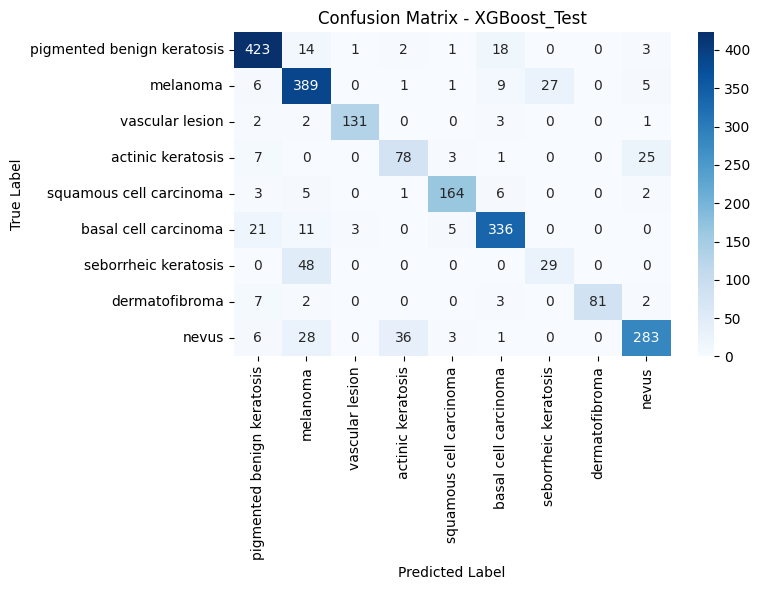

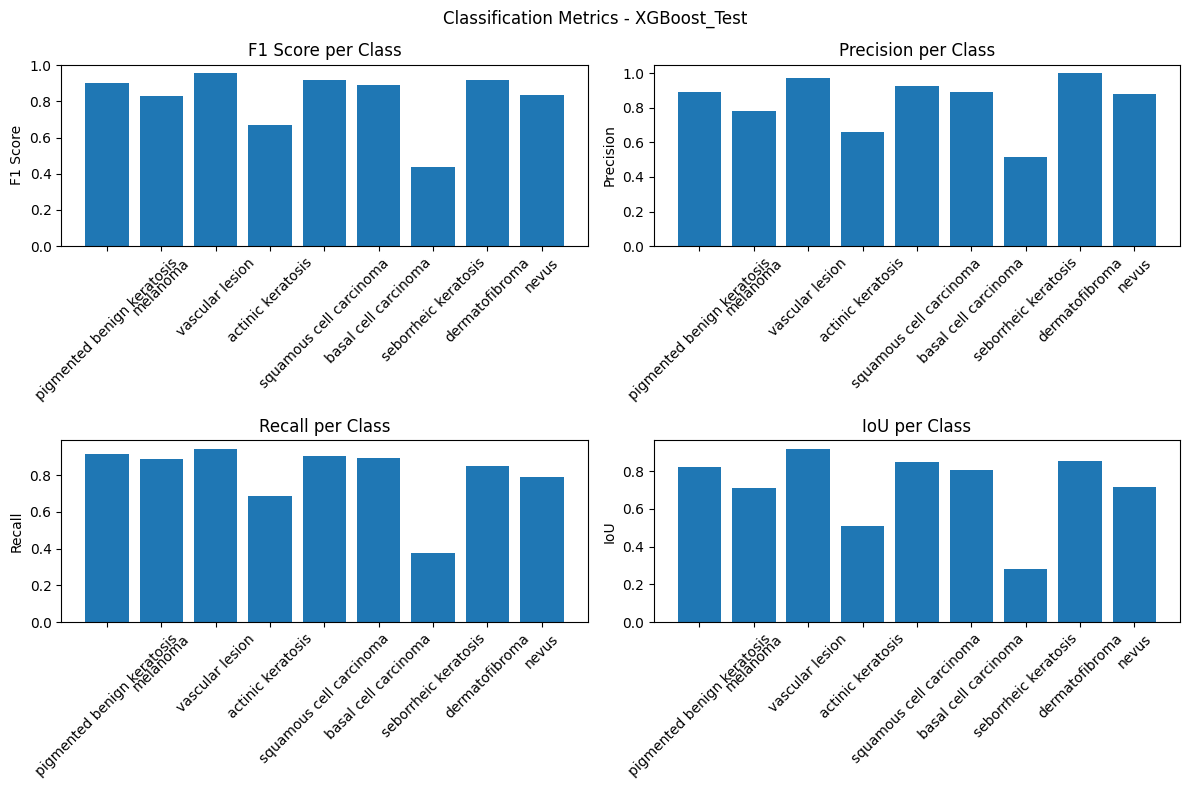

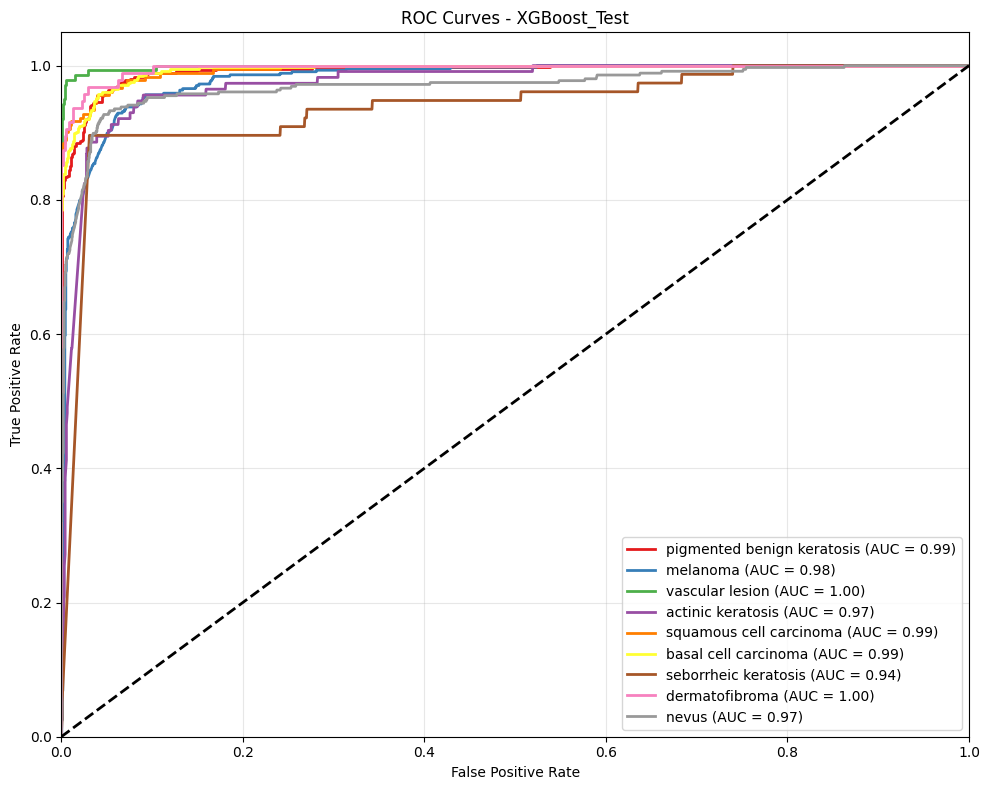

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric

COMPREHENSIVE REPORT - LightGBM_Test
Accuracy: 0.8508
Precision (Macro): 0.8302
Precision (Micro): 0.8508
Recall (Macro): 0.7988
Recall (Micro): 0.8508
F1 Score (Macro): 0.8104
F1 Score (Micro): 0.8508
F1 Score (Weighted): 0.8492
Kappa Score: 0.8237
Mean IoU: 0.7053
Mean AUC: 0.9804

Per-Class Metrics:
  Class 0: Precision=0.8857, Recall=0.9221, F1=0.9035, IoU=0.8240
  Class 1: Precision=0.7769, Recall=0.8904, F1=0.8298, IoU=0.7091
  Class 2: Precision=0.9769, Recall=0.9137, F1=0.9442, IoU=0.8944
  Class 3: Precision=0.6462, Recall=0.7368, F1=0.6885, IoU=0.5250
  Class 4: Precision=0.8956, Recall=0.9006, F1=0.8981, IoU=0.8150
  Class 5: Precision=0.9054, Recall=0.8910, F1=0.8981, IoU=0.8151
  Class 6: Precision=0.5192, Recall=0.3506, F1=0.4186, IoU=0.2647
  Class 7: Precision=0.9872, Recall=0.8105, F1=0.8902, IoU=0.8021
  Class 8: Precision=0.8790, Recall=0.7731, F1=0.8227, IoU=0.69

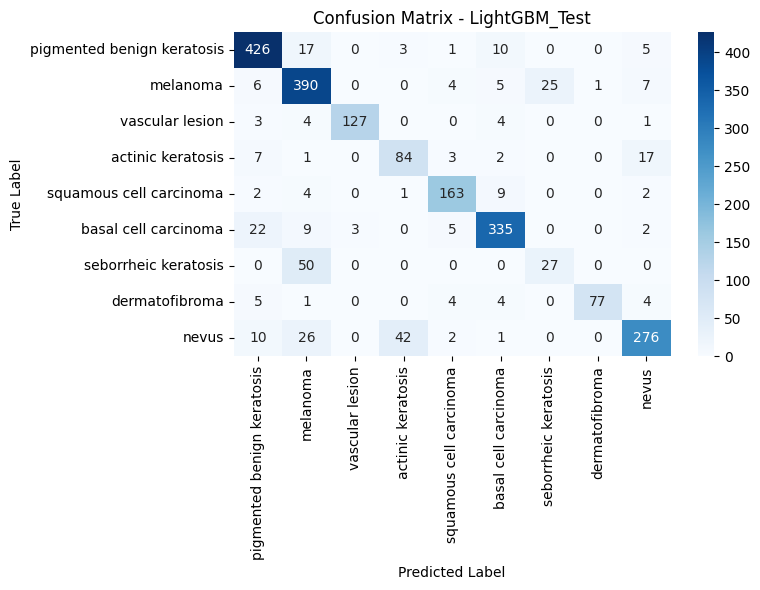

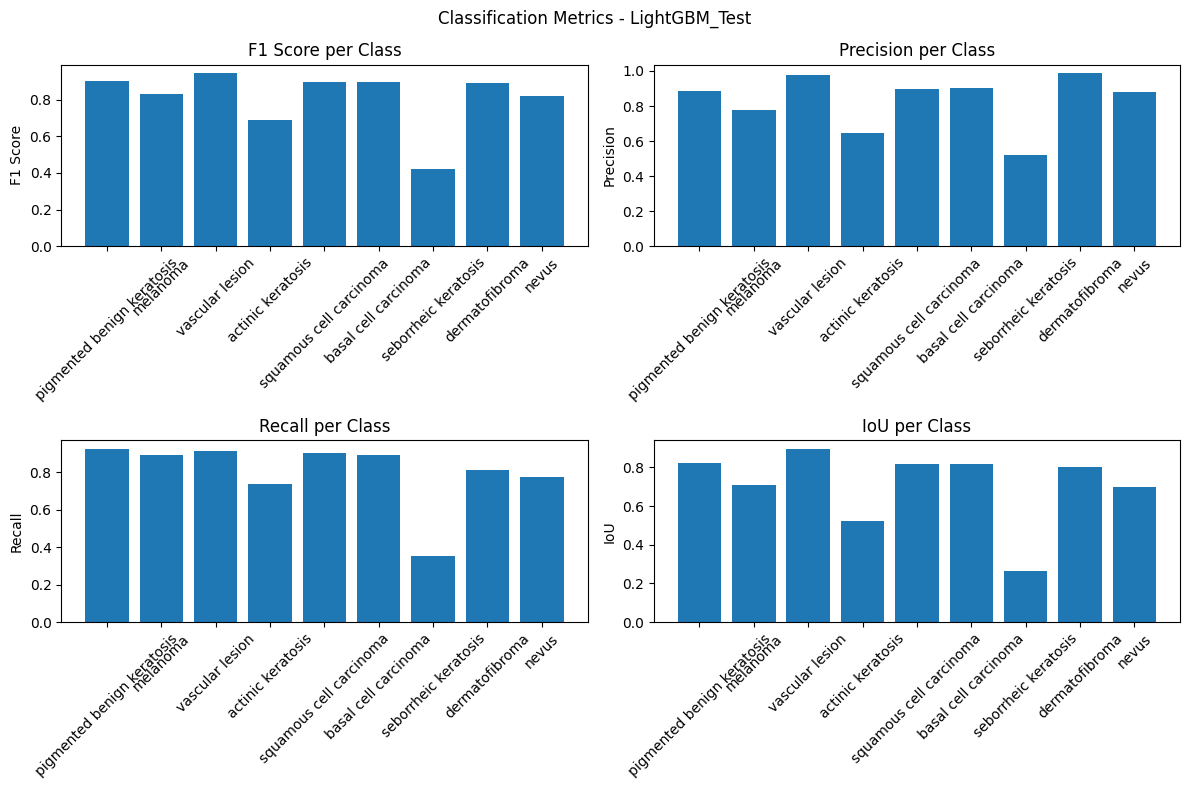

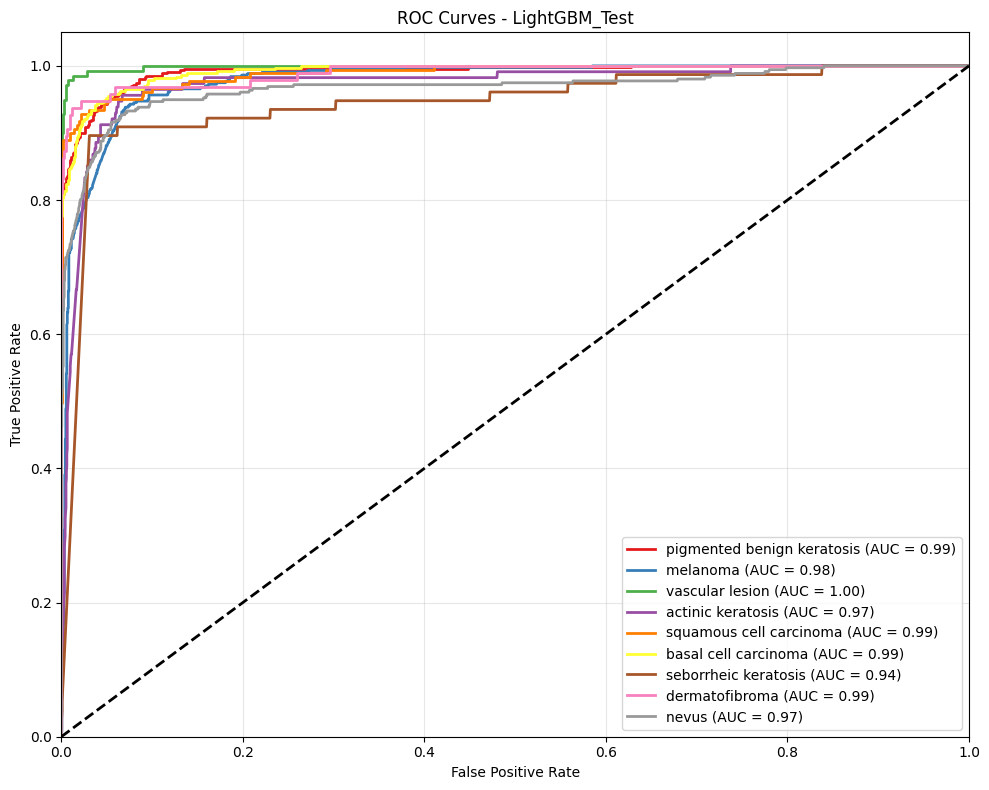

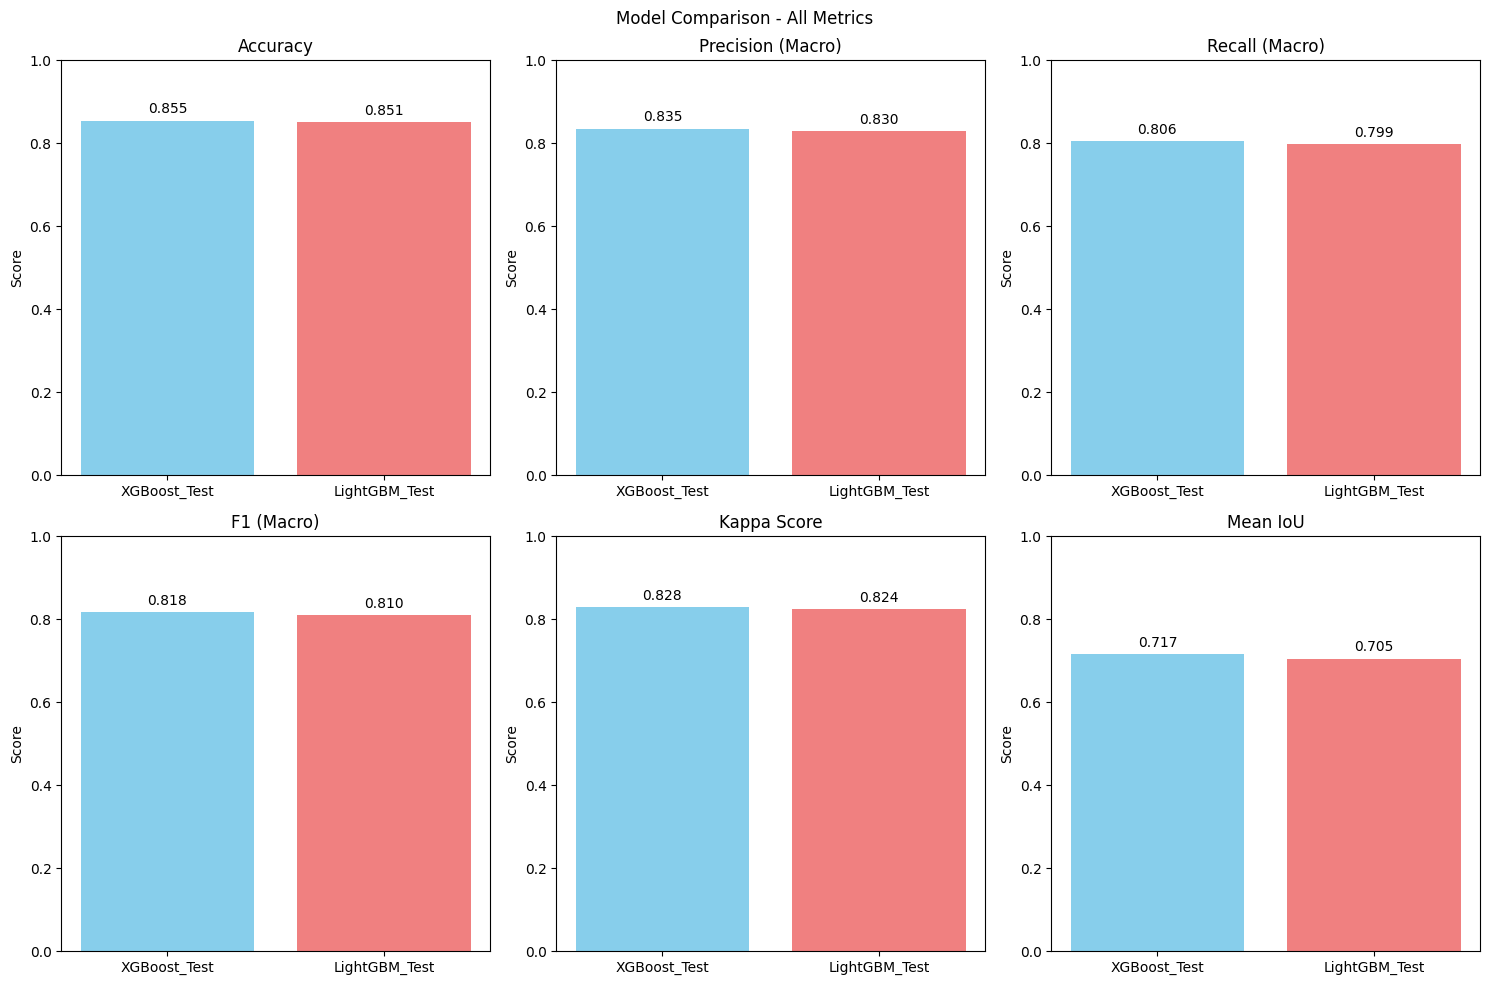

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    precision_score, recall_score, f1_score, cohen_kappa_score,
    roc_auc_score, roc_curve, precision_recall_curve, auc
)
from sklearn.preprocessing import LabelBinarizer
import xgboost as xgb
import lightgbm as lgb
import itertools
import tensorflow as tf
from keras.applications import MobileNetV2
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout

class ComprehensiveXGBoostLightGBM:
    def __init__(self, feature_extractor_type='mobilenet', img_size=(224, 224)):
        self.img_size = img_size
        self.feature_extractor = self._build_feature_extractor(feature_extractor_type)
        self.models = {}
        self.results = {}
        self.class_names = None

    def _build_feature_extractor(self, model_type):
        """Build feature extraction model"""
        if model_type == 'mobilenet':
            return MobileNetV2(weights='imagenet', include_top=False, pooling='avg',
                             input_shape=self.img_size + (3,))
        # Add other extractors as needed

    def extract_features_from_dataset(self, dataset):
        """Extract features from your preprocessed dataset"""
        features = []
        labels = []

        for batch in dataset:
            # Extract features from original images
            batch_features = self.feature_extractor.predict(batch['original'], verbose=0)
            features.append(batch_features)
            labels.append(batch['label'].numpy())

        features = np.vstack(features)
        labels = np.concatenate(labels)

        return features, labels

    def calculate_iou_multiclass(self, y_true, y_pred, num_classes):
        """Calculate IoU for multiclass classification"""
        ious = []

        for class_id in range(num_classes):
            # Convert to binary problem for each class
            true_binary = (y_true == class_id).astype(int)
            pred_binary = (y_pred == class_id).astype(int)

            # Calculate IoU for this class
            intersection = np.sum(true_binary & pred_binary)
            union = np.sum(true_binary | pred_binary)

            if union == 0:
                iou = 1.0 if intersection == 0 else 0.0
            else:
                iou = intersection / union

            ious.append(iou)

        return np.array(ious)

    def calculate_comprehensive_metrics(self, y_true, y_pred, y_prob=None, model_name="Model"):
        """Calculate all comprehensive metrics"""
        num_classes = len(np.unique(y_true))

        # Basic metrics
        accuracy = accuracy_score(y_true, y_pred)
        precision_macro = precision_score(y_true, y_pred, average='macro', zero_division=0)
        precision_micro = precision_score(y_true, y_pred, average='micro', zero_division=0)
        recall_macro = recall_score(y_true, y_pred, average='macro', zero_division=0)
        recall_micro = recall_score(y_true, y_pred, average='micro', zero_division=0)
        f1_macro = f1_score(y_true, y_pred, average='macro', zero_division=0)
        f1_micro = f1_score(y_true, y_pred, average='micro', zero_division=0)
        f1_weighted = f1_score(y_true, y_pred, average='weighted', zero_division=0)

        # Kappa score
        kappa = cohen_kappa_score(y_true, y_pred)

        # IoU
        iou_per_class = self.calculate_iou_multiclass(y_true, y_pred, num_classes)
        mean_iou = np.mean(iou_per_class)

        # Confusion Matrix
        cm = confusion_matrix(y_true, y_pred)

        # Per-class metrics
        per_class_precision = precision_score(y_true, y_pred, average=None, zero_division=0)
        per_class_recall = recall_score(y_true, y_pred, average=None, zero_division=0)
        per_class_f1 = f1_score(y_true, y_pred, average=None, zero_division=0)

        # AUC if probabilities are provided
        auc_scores = None
        if y_prob is not None and num_classes > 2:
            # For multiclass, calculate AUC for each class vs rest
            lb = LabelBinarizer()
            y_true_binary = lb.fit_transform(y_true)
            if y_true_binary.shape[1] == 1:  # Binary case
                y_true_binary = np.hstack([1 - y_true_binary, y_true_binary])

            auc_scores = []
            for i in range(num_classes):
                if len(np.unique(y_true_binary[:, i])) > 1:  # Check if class exists
                    auc_score = roc_auc_score(y_true_binary[:, i], y_prob[:, i])
                    auc_scores.append(auc_score)
                else:
                    auc_scores.append(0.0)
            auc_scores = np.array(auc_scores)

        # Store results
        results = {
            'model_name': model_name,
            'accuracy': accuracy,
            'precision_macro': precision_macro,
            'precision_micro': precision_micro,
            'recall_macro': recall_macro,
            'recall_micro': recall_micro,
            'f1_macro': f1_macro,
            'f1_micro': f1_micro,
            'f1_weighted': f1_weighted,
            'kappa': kappa,
            'mean_iou': mean_iou,
            'iou_per_class': iou_per_class,
            'confusion_matrix': cm,
            'per_class_precision': per_class_precision,
            'per_class_recall': per_class_recall,
            'per_class_f1': per_class_f1,
            'auc_scores': auc_scores,
            'y_true': y_true,
            'y_pred': y_pred,
            'y_prob': y_prob
        }

        return results

    def train_xgboost(self, X_train, y_train, X_val, y_val, model_name="XGBoost"):
        """Train XGBoost with comprehensive evaluation"""
        print(f"Training {model_name}...")

        # XGBoost parameters
        params = {
            'objective': 'multi:softprob',
            'num_class': len(np.unique(y_train)),
            'max_depth': 6,
            'learning_rate': 0.1,
            'n_estimators': 1000,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'random_state': 42,
            'early_stopping_rounds': 50,
            'eval_metric': 'mlogloss'
        }

        model = xgb.XGBClassifier(**params)

        # Train with validation
        model.fit(
            X_train, y_train,
            eval_set=[(X_val, y_val)],
            verbose=100
        )

        # Predictions
        y_pred = model.predict(X_val)
        y_prob = model.predict_proba(X_val)

        # Calculate metrics
        results = self.calculate_comprehensive_metrics(y_val, y_pred, y_prob, model_name)

        self.models[model_name] = model
        self.results[model_name] = results

        return model, results

    def train_lightgbm(self, X_train, y_train, X_val, y_val, model_name="LightGBM"):
        """Train LightGBM with comprehensive evaluation"""
        print(f"Training {model_name}...")

        # LightGBM parameters
        params = {
            'objective': 'multiclass',
            'num_class': len(np.unique(y_train)),
            'max_depth': 6,
            'learning_rate': 0.1,
            'n_estimators': 1000,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'random_state': 42,
            'early_stopping_rounds': 50,
            'eval_metric': 'multi_logloss'
        }

        model = lgb.LGBMClassifier(**params)

        # Train with validation
        model.fit(
            X_train, y_train,
            eval_set=[(X_val, y_val)]
            # verbose=100  # Removed verbose as it's not a supported argument in this version
        )

        # Predictions
        y_pred = model.predict(X_val)
        y_prob = model.predict_proba(X_val)

        # Calculate metrics
        results = self.calculate_comprehensive_metrics(y_val, y_pred, y_prob, model_name)

        self.models[model_name] = model
        self.results[model_name] = results

        return model, results

    def plot_confusion_matrix(self, results, class_names=None, figsize=(8, 6)):
        """Plot confusion matrix"""
        cm = results['confusion_matrix']

        plt.figure(figsize=figsize)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=class_names, yticklabels=class_names)
        plt.title(f'Confusion Matrix - {results["model_name"]}')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.tight_layout()
        plt.show()

    def plot_classification_metrics(self, results, class_names=None, figsize=(12, 8)):
        """Plot comprehensive classification metrics"""
        fig, axes = plt.subplots(2, 2, figsize=figsize)

        # Per-class metrics
        classes = class_names if class_names else [f'Class {i}' for i in range(len(results['per_class_f1']))]

        # F1 Score per class
        axes[0, 0].bar(classes, results['per_class_f1'])
        axes[0, 0].set_title('F1 Score per Class')
        axes[0, 0].set_ylabel('F1 Score')
        axes[0, 0].tick_params(axis='x', rotation=45)

        # Precision per class
        axes[0, 1].bar(classes, results['per_class_precision'])
        axes[0, 1].set_title('Precision per Class')
        axes[0, 1].set_ylabel('Precision')
        axes[0, 1].tick_params(axis='x', rotation=45)

        # Recall per class
        axes[1, 0].bar(classes, results['per_class_recall'])
        axes[1, 0].set_title('Recall per Class')
        axes[1, 0].set_ylabel('Recall')
        axes[1, 0].tick_params(axis='x', rotation=45)

        # IoU per class
        axes[1, 1].bar(classes, results['iou_per_class'])
        axes[1, 1].set_title('IoU per Class')
        axes[1, 1].set_ylabel('IoU')
        axes[1, 1].tick_params(axis='x', rotation=45)

        plt.suptitle(f'Classification Metrics - {results["model_name"]}')
        plt.tight_layout()
        plt.show()

    def plot_roc_curves(self, results, class_names=None, figsize=(10, 8)):
        """Plot ROC curves for each class"""
        if results['y_prob'] is None:
            print("No probability predictions available for ROC curves")
            return

        num_classes = len(np.unique(results['y_true']))
        classes = class_names if class_names else [f'Class {i}' for i in range(num_classes)]

        plt.figure(figsize=figsize)

        # Binarize labels
        lb = LabelBinarizer()
        y_true_binary = lb.fit_transform(results['y_true'])
        if y_true_binary.shape[1] == 1:  # Binary case
            y_true_binary = np.hstack([1 - y_true_binary, y_true_binary])

        colors = plt.cm.Set1(np.linspace(0, 1, num_classes))

        for i, color in zip(range(num_classes), colors):
            if len(np.unique(y_true_binary[:, i])) > 1:
                fpr, tpr, _ = roc_curve(y_true_binary[:, i], results['y_prob'][:, i])
                roc_auc = auc(fpr, tpr)
                plt.plot(fpr, tpr, color=color, lw=2,
                        label=f'{classes[i]} (AUC = {roc_auc:.2f})')

        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curves - {results["model_name"]}')
        plt.legend(loc="lower right")
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

    def plot_metrics_comparison(self, figsize=(15, 10)):
        """Plot comparison of all metrics between models"""
        if len(self.results) < 2:
            print("Need at least 2 models for comparison")
            return

        fig, axes = plt.subplots(2, 3, figsize=figsize)

        model_names = list(self.results.keys())

        # Overall metrics
        metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'kappa', 'mean_iou']
        metric_titles = ['Accuracy', 'Precision (Macro)', 'Recall (Macro)', 'F1 (Macro)', 'Kappa Score', 'Mean IoU']

        for idx, (metric, title) in enumerate(zip(metrics, metric_titles)):
            row = idx // 3
            col = idx % 3

            values = [self.results[model][metric] for model in model_names]
            bars = axes[row, col].bar(model_names, values, color=['skyblue', 'lightcoral'][:len(model_names)])
            axes[row, col].set_title(title)
            axes[row, col].set_ylabel('Score')
            axes[row, col].set_ylim(0, 1)

            # Add value labels on bars
            for bar, value in zip(bars, values):
                axes[row, col].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                                  f'{value:.3f}', ha='center', va='bottom')

        plt.suptitle('Model Comparison - All Metrics')
        plt.tight_layout()
        plt.show()

    def print_comprehensive_report(self, results):
        """Print detailed classification report"""
        print(f"\n{'='*60}")
        print(f"COMPREHENSIVE REPORT - {results['model_name']}")
        print(f"{'='*60}")

        print(f"Accuracy: {results['accuracy']:.4f}")
        print(f"Precision (Macro): {results['precision_macro']:.4f}")
        print(f"Precision (Micro): {results['precision_micro']:.4f}")
        print(f"Recall (Macro): {results['recall_macro']:.4f}")
        print(f"Recall (Micro): {results['recall_micro']:.4f}")
        print(f"F1 Score (Macro): {results['f1_macro']:.4f}")
        print(f"F1 Score (Micro): {results['f1_micro']:.4f}")
        print(f"F1 Score (Weighted): {results['f1_weighted']:.4f}")
        print(f"Kappa Score: {results['kappa']:.4f}")
        print(f"Mean IoU: {results['mean_iou']:.4f}")

        if results['auc_scores'] is not None:
            print(f"Mean AUC: {np.mean(results['auc_scores']):.4f}")

        print(f"\nPer-Class Metrics:")
        for i in range(len(results['per_class_f1'])):
            print(f"  Class {i}: Precision={results['per_class_precision'][i]:.4f}, "
                  f"Recall={results['per_class_recall'][i]:.4f}, "
                  f"F1={results['per_class_f1'][i]:.4f}, "
                  f"IoU={results['iou_per_class'][i]:.4f}")

        print(f"\nConfusion Matrix:")
        print(results['confusion_matrix'])

    def run_complete_analysis(self, train_dataset, val_dataset, test_dataset, class_names=None):
        """Run complete analysis with both XGBoost and LightGBM"""
        self.class_names = class_names

        # Extract features
        print("Extracting features...")
        X_train, y_train = self.extract_features_from_dataset(train_dataset)
        X_val, y_val = self.extract_features_from_dataset(val_dataset)
        X_test, y_test = self.extract_features_from_dataset(test_dataset)

        print(f"Feature shape: {X_train.shape}")
        print(f"Number of classes: {len(np.unique(y_train))}")

        # Train both models
        xgb_model, xgb_results = self.train_xgboost(X_train, y_train, X_val, y_val)
        lgb_model, lgb_results = self.train_lightgbm(X_train, y_train, X_val, y_val)

        # Test on test set
        print("\nEvaluating on test set...")
        for model_name, model in self.models.items():
            y_pred_test = model.predict(X_test)
            y_prob_test = model.predict_proba(X_test)

            test_results = self.calculate_comprehensive_metrics(
                y_test, y_pred_test, y_prob_test, f"{model_name}_Test"
            )

            self.results[f"{model_name}_Test"] = test_results

            # Print comprehensive report
            self.print_comprehensive_report(test_results)

            # Plot all visualizations
            self.plot_confusion_matrix(test_results, class_names)
            self.plot_classification_metrics(test_results, class_names)
            self.plot_roc_curves(test_results, class_names)

        # Compare models
        test_results_only = {k: v for k, v in self.results.items() if "_Test" in k}
        if len(test_results_only) >= 2:
            # Create temporary results for comparison
            temp_results = self.results.copy()
            self.results = test_results_only
            self.plot_metrics_comparison()
            self.results = temp_results

        return self.models, self.results

# Usage Example:
# Initialize the comprehensive analyzer
analyzer = ComprehensiveXGBoostLightGBM(
    feature_extractor_type='mobilenet',
    img_size=(224, 224)
)

# Define your class names (optional)
class_names = os.listdir(train_image_folder)  # Replace with your actual class names

# Run complete analysis
models, results = analyzer.run_complete_analysis(
    train_dataset,
    val_dataset,
    test_dataset,
    class_names=class_names
)

# Access individual results
xgb_test_results = results['XGBoost_Test']
lgb_test_results = results['LightGBM_Test']

# You can also train individual models
# xgb_model, xgb_results = analyzer.train_xgboost(X_train, y_train, X_val, y_val)
# analyzer.print_comprehensive_report(xgb_results)
# analyzer.plot_confusion_matrix(xgb_results, class_names)

In [ ]:
import pandas as pd

# Extract key metrics from test results
xgb_metrics = {
    'Model': 'XGBoost (Test)',
    'Accuracy': xgb_test_results['accuracy'],
    'Precision (Macro)': xgb_test_results['precision_macro'],
    'Recall (Macro)': xgb_test_results['recall_macro'],
    'F1 Score (Macro)': xgb_test_results['f1_macro'],
    'Kappa Score': xgb_test_results['kappa'],
    'Mean IoU': xgb_test_results['mean_iou'],
    'Mean AUC': np.mean(xgb_test_results['auc_scores']) if xgb_test_results['auc_scores'] is not None else None
}

lgb_metrics = {
    'Model': 'LightGBM (Test)',
    'Accuracy': lgb_test_results['accuracy'],
    'Precision (Macro)': lgb_test_results['precision_macro'],
    'Recall (Macro)': lgb_test_results['recall_macro'],
    'F1 Score (Macro)': lgb_test_results['f1_macro'],
    'Kappa Score': lgb_test_results['kappa'],
    'Mean IoU': lgb_test_results['mean_iou'],
    'Mean AUC': np.mean(lgb_test_results['auc_scores']) if lgb_test_results['auc_scores'] is not None else None
}

# Create a DataFrame
performance_df = pd.DataFrame([xgb_metrics, lgb_metrics])

# Display the DataFrame
display(performance_df)

Model  Accuracy  Precision (Macro)  Recall (Macro)  \
0   XGBoost (Test)  0.854846           0.835417        0.805782   
1  LightGBM (Test)  0.850826           0.830225        0.798755   

   F1 Score (Macro)  Kappa Score  Mean IoU  Mean AUC  
0          0.817977     0.828480  0.717160  0.981891  
1          0.810408     0.823732  0.705339  0.980369